# Multi-Response Linear Regression

## Multi-Response Linear Regression

Multivariate multi-response linear regression (a.k.a., multi-task learning) aims at predicting multiple responses at the same time, and thus, it is a natural extension for classical linear regression where the response is univariate. 
Multivariate multi-response linear regression (MMLR) is very helpful for the analysis of correlated response such as chemical measurements for soil samples and 
microRNAs associated with Glioblastoma multiforme cancer. 
Suppose $y$ is an $m$-dimensional response variable, 
$x$ is $p$-dimensional predictors, 
$B \in R^{m \times p}$ is the coefficient matrix, 
the MMLR model for the multivariate response is given by

$$y = B x + \epsilon,$$

where $\epsilon$ is an $m$-dimensional random noise variable with zero mean. 

Due to the Occam's razor principle or the high-dimensionality of predictors, it is meaningful to use a small amount of predictors to conduct multi-task learning. For example, understanding the relationship between gene expression and symptoms of a disease has significant importance in identifying potential markers. Many diseases usually involve multiple manifestations and those manifestations are usually related. In some cases, it makes sense to predict those manifestations using a small but the same set of predictors. The best subset selection problem under the MMLR model is formulated as 

$$\frac{1}{2n} \| Y - XB \|_{2}^2, \text{ subject to: } \| B \|_{0, 2} \leq s,$$

where, $Y \in R^{n \times m}$ and $X \in R^{n \times p}$ record 
$n$ observations' response and predictors, respectively. 
Here $\| B \|_{0, 2} = \sum_{i = 1}^{p} I(B_{i\cdot} = {\bf 0})$, 
where $B_{i\cdot}$ is the $i$-th row of coefficient matrix $B$ and 
${\bf 0} \in R^{m}$ is an all-zero vector. 

## Simulated Data Example

We use an artificial dataset to demonstrate how to solve best subset selection problem for MMLR with `abess` package. 
The `make_multivariate_glm_data()` function provides a simple way to generate suitable dataset for this task. 
The synthetic data have 100 observations with 3-dimensional responses and 20-dimensional predictors. Note that there are three predictors having an impact on the responses.

In [2]:
from abess.datasets import make_multivariate_glm_data
import numpy as np
np.random.seed(0)

n = 100
p = 20
M = 3
k = 3

data = make_multivariate_glm_data(n = n, p = p, M = M, k = k, family = 'multigaussian')
print(data.y[0:5,])

[[-8.33705583  9.41290696  9.30385296]
 [ 2.59844112  2.03372877 -5.41564214]
 [ 2.86397067 -0.0425234  -3.62823022]
 [ 3.11078427 -6.01532756 -6.5221093 ]
 [ 2.67815098  1.10487988 -0.01642332]]


In [3]:
print(data.coef_)
print("non-zero: ", set(np.nonzero(data.coef_)[0]))

[[ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.8880576   2.35738133  0.33938644]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 2.33460874 -3.0222518  -1.63030259]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [-0.25565796 -0.25578781 -3.82878688]
 [ 0.          0.          0.        ]]
non-zero:  {2, 18, 5}


### Model Fitting

To carry out sparse mutli-task learning, we can call the `MultiTaskRegression` like:

In [4]:
from abess import MultiTaskRegression
model = MultiTaskRegression()
model.fit(data.x, data.y)

MultiTaskRegression(always_select=[])

After fitting, `model.coef_` contains the predicted coefficients:

In [5]:
print(model.coef_)
print("non-zero: ", set(np.nonzero(model.coef_)[0]))

[[ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 1.01509321  2.2784727   0.38024056]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 2.4920076  -3.20500248 -1.52222419]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [-0.43826146 -0.08735413 -4.0545978 ]
 [ 0.          0.          0.        ]]
non-zero:  {2, 18, 5}


The outputs show that the support set is correctly identified and the parameter estimation approaches to the truth.    

### More on the results

Since there are three responses, we have three solution paths, which correspond to three responses, respectively. 
To plot the figure, we can fix the `support_size` at different levels:

In [6]:
import matplotlib.pyplot as plt

coef = np.zeros((3, 21, 20))
for s in range(21):
    model = MultiTaskRegression(support_size = s)
    model.fit(data.x, data.y)     

    for y in range(3):
        coef[y, s, :] = model.coef_[:, y]


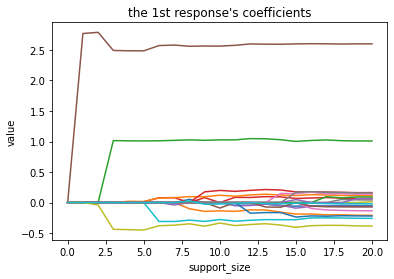

In [19]:
for i in range(20):
    plt.plot(coef[0, :, i])
plt.xlabel('support_size')
plt.ylabel('value')
plt.title('the 1st response\'s coefficients')
plt.show()

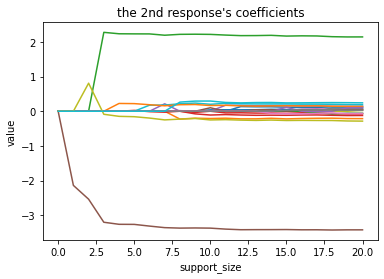

In [20]:
for i in range(20):
    plt.plot(coef[1, :, i])
plt.xlabel('support_size')
plt.ylabel('value')
plt.title('the 2nd response\'s coefficients')
plt.show()


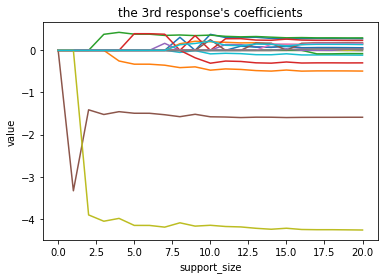

In [21]:
for i in range(20):
    plt.plot(coef[2, :, i])
plt.xlabel('support_size')
plt.ylabel('value')
plt.title('the 3rd response\'s coefficients')
plt.show()

## R tutorial

For R tutorial, please view [https://abess-team.github.io/abess/articles/v06-MultiTaskLearning.html](https://abess-team.github.io/abess/articles/v06-MultiTaskLearning.html).